# **World Cup 2022: Who is going to be crowned the champion of world football!** 🏆⚽

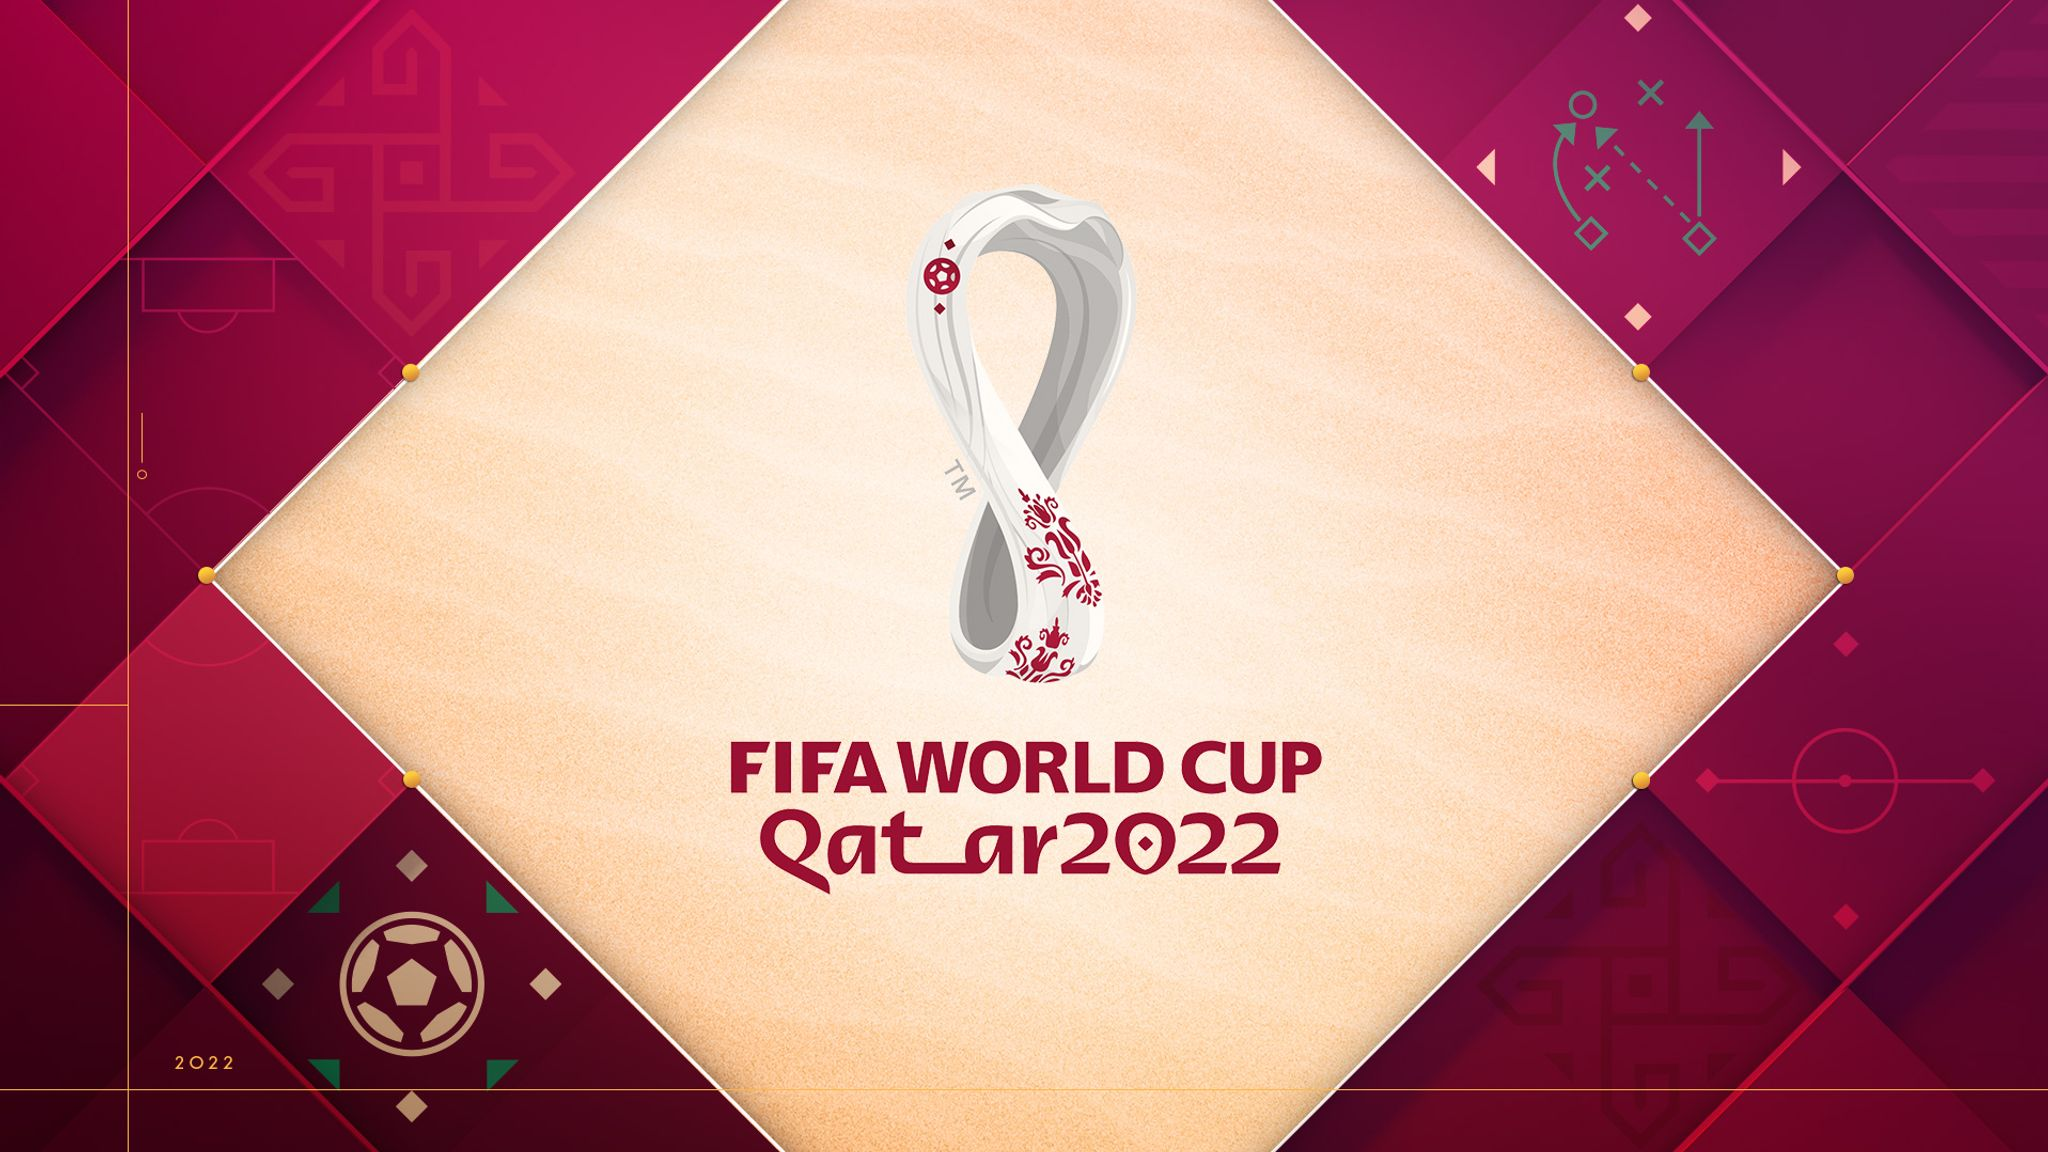

**Project Description**

The world cup is finally here again! Being an ardent football fan, this is of great excitement. 

After all, the World Cup is only held every 4 years where 32 teams all across the globe come together to compete. 

In this project, we shall see if it is possible to predict who would be crowned the champions of the World! 🏆

**Credits**
*   Dataset: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022

**As a preface, this notebook is split 3 main portions**


1.   Data exploration & Data preprocessing
2.   Model building
3.   Simulation

**Problem Statement:** Predict the winner of World Cup 2022

## **Data Exploration & Data Preprocessing**

In [1]:
#import neccessary libraries we would be working with
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import pickle
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get data: This CSV holds match and team statistics for international games
!cp /content/drive/MyDrive/international_matches.csv -d /content

# list of participating countries in the 2022 FIFA World Cup
FIFA_2022_TEAMS = ['Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal', 'Mexico',
'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'USA','Croatia', 'Senegal',
'IR Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'Korea Republic', 'Tunisia', 'Cameroon', 
'Canada', 'Ecuador','Saudi Arabia', 'Ghana', 'Wales','Costa Rica', 'Australia']
FIFA_2022_TEAMS.sort() # sort by alphabetical order for uniformity

In [3]:
# read csv into df
df = pd.read_csv('/content/international_matches.csv', parse_dates = ['date']) # set date format in df to YY-MM-DD
df.head(10) # print some rows so we can visualise what we are dealing with

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("====================================")
print("||          Column Names          ||")
print("====================================")

for col in df.columns: # get list of columns names
  print(col)

||          Column Names          ||
date
home_team
away_team
home_team_continent
away_team_continent
home_team_fifa_rank
away_team_fifa_rank
home_team_total_fifa_points
away_team_total_fifa_points
home_team_score
away_team_score
tournament
city
country
neutral_location
shoot_out
home_team_result
home_team_goalkeeper_score
away_team_goalkeeper_score
home_team_mean_defense_score
home_team_mean_offense_score
home_team_mean_midfield_score
away_team_mean_defense_score
away_team_mean_offense_score
away_team_mean_midfield_score


### **Quick Analysis**

From the above, we can automatically spot a few issues

**1.**   Firstly, some of these matches were played ages ago, with the furthest back match being played in 1993...
*   In the world of football, it would be unspeakable to use these data. After all, dominance from certain countries come and fade away. 
*   Star players are generational talents which only appear once in a blue moon. Only some countries are blessed enough to have them.

That being said, lets consider matches after a reasonable date. After the year 2014; 2 world cups back (While this is pushing it a little and I would have liked to use more recent data, limiting data further would lead to insufficient data). 

**2.**   Secondly, it is clear that we can eliminate certain features here from the get go. Information such as 'home_team_continent' and 'away_team_continent' should be irrelavant to whether a team lose, draw, or win.

**3.** Thirdly, some features definitely look worth looking into. Fifa team ranking, goalkeeper, midfield, defense, and offence scores certainly sound like they can play a factor in whether a team lose, draw, or win.

**Limit data to include only matches played after the year 2014**

In [5]:
# Number of matches played after the year 2014
num_matches_2014 = len(df[df['date'].dt.year >= 2014])
print("Number of matches after the year 2014:", num_matches_2014)

Number of matches after the year 2014: 7329


7.3k data is not exactly ideal, but it is what we have to work with to ensure we have slightly more relevant results.

In [6]:
# Create a year feature in df that indicate the year in which the match was played
df = df[df['date'].dt.year >= 2014].reset_index(drop=True)
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,2014-01-01,Kuwait,Jordan,Asia,Asia,105,65,314,535,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
1,2014-01-04,Bahrain,Jordan,Asia,Asia,110,65,291,535,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
2,2014-01-04,Namibia,Ghana,Africa,Africa,125,24,237,848,0,...,Lose,NaN,71.0,NaN,NaN,NaN,70.5,72.7,78.5,2014
3,2014-01-04,Nigeria,Ethiopia,Africa,Africa,37,93,710,374,2,...,Win,79.0,NaN,70.8,74.7,76.2,NaN,NaN,NaN,2014
4,2014-01-04,Qatar,Kuwait,Asia,Asia,103,105,324,314,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


**Drop some irrelevant columns here too**

In [7]:
df = df.drop(columns=['home_team_continent',	'away_team_continent', 'tournament', 'city', 'country'])

**Before we get further, let me sate my curiosity.**
###  **Which Top 32 FIFA Ranked Teams Made The World Cup? Who Has Missed Out?**

In [8]:
fifa_ranking_df = df[['date', 'home_team',	'away_team', 'home_team_fifa_rank',	'away_team_fifa_rank']]
home_team_df = fifa_ranking_df[['date', 'home_team', 'home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away_team_df = fifa_ranking_df[['date', 'away_team', 'away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
fifa_ranking_df = pd.concat([home_team_df,away_team_df]) 

In [10]:
fifa_ranking_df = fifa_ranking_df.sort_values(['team','date'],ascending=[True,False]) # sort by the most recent date so we can get the most recent FIFA rankings
fifa_ranked = fifa_ranking_df.groupby('team').first().sort_values('rank',ascending=True).reset_index() # get the most recent ranking for each team and sort by rank in increasing order
fifa_ranking_top_32 = fifa_ranked[:32] # get the top 32 ranked teams 
fifa_ranking_top_32 = list(fifa_ranking_top_32['team'])
fifa_ranking_top_32.sort()

In [12]:
teams_that_made_it = []
teams_that_failed = []

for team in fifa_ranking_top_32:
  if team in FIFA_2022_TEAMS:
    teams_that_made_it.append(team)
  else:
    teams_that_failed.append(team)

print("===================================================================================")
print("Teams that are in the top 32 FIFA rankings and made it to World Cup 2022 include:")
print("===================================================================================")
[print(t) for t in teams_that_made_it]
print("===================================================================================")
print("Teams that are in the top 32 FIFA rankings but failed to make it to World Cup 2022 include:")
print("===================================================================================")
[print(t) for t in teams_that_failed]
print("===================================================================================")

Teams that are in the top 32 FIFA rankings and made it to World Cup 2022 include:
Argentina
Belgium
Brazil
Costa Rica
Croatia
Denmark
England
France
Germany
IR Iran
Japan
Korea Republic
Mexico
Morocco
Netherlands
Poland
Portugal
Senegal
Serbia
Spain
Switzerland
USA
Uruguay
Wales
Teams that are in the top 32 FIFA rankings but failed to make it to World Cup 2022 include:
Chile
Colombia
Egypt
Italy
Nigeria
Peru
Sweden
Ukraine


**Seems like FIFA rankings are pretty indicative! 3/4 of the team in the top 32 are indeed part of the 32 teams participating in the World Cup.**

There are some teams which suprisingly failed to make it. Namely Italy (Euro 2020 winners)

While we are at it, let's see which teams managed to punch above their weight to make it to World Cup 2022

In [13]:
teams_that_suprised = []

for team in FIFA_2022_TEAMS:
  if team not in fifa_ranking_top_32:
    teams_that_suprised.append(team)

print("===================================================================================")
print("Teams that are out of the top 32 FIFA rankings but made it to World Cup 2022 include:\n")
print("===================================================================================")
for t in teams_that_suprised:
  print("Team: {:15s} \t Ranking: {:d}".format(t, int(fifa_ranked[fifa_ranked['team'] == t]['rank'])))
print("===================================================================================")

Teams that are out of the top 32 FIFA rankings but made it to World Cup 2022 include:

Team: Australia       	 Ranking: 42
Team: Cameroon        	 Ranking: 37
Team: Canada          	 Ranking: 38
Team: Ecuador         	 Ranking: 46
Team: Ghana           	 Ranking: 60
Team: Qatar           	 Ranking: 52
Team: Saudi Arabia    	 Ranking: 49
Team: Tunisia         	 Ranking: 35


Some teams here like Tunisia are certainly close enough to the top 32. 

Meanwhile, teams like Ghana have performed exceedingly well. Despite being ranked 60, they have managed to qualify for World Cup 2022.

Qatar has made it as the host country. 

### **Data Cleaning**


#### **Cleaning NULL Data**

In [14]:
# check out number of NULL data we have for each column
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       3096
away_team_goalkeeper_score       3323
home_team_mean_defense_score     3350
home_team_mean_offense_score     3204
home_team_mean_midfield_score    3127
away_team_mean_defense_score     3563
away_team_mean_offense_score     3364
away_team_mean_midfield_score    3295
year                                0
dtype: int64

NULL data predominantly lies in the positional scores; goalkeeper, defense, offense, midfield score

I shall deal with NULL data in 2 ways
1.   Filling in missing values with the mean positional score of the team for the particular year.
2.   Filling in missing values with 55. Some teams just arent proficient enough in some areas. That is to say, they are some ways below the average score. A such, no score is assigned to them. For the sake of having workable data to deal with, I have decided upon the value of 55 to be assigned in such cases.

In [15]:
# get column of home and away scores
home_scores = ['home_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', ]
away_scores = ['away_team_goalkeeper_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']

# replace NULL values with as accurate values as possible
for home_column, away_column in zip(home_scores, away_scores):
  df[home_column] = df.groupby(['home_team', 'year'])[home_column].transform(lambda x : x.fillna(x.mean()))
  df[away_column] = df.groupby(['away_team', 'year'])[away_column].transform(lambda x : x.fillna(x.mean()))

try:
  df.fillna(55,inplace=True)
except:
  pass

In [16]:
df.isnull().sum() # check if we still have NULL values left

date                             0
home_team                        0
away_team                        0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
year                             0
dtype: int64

No more NULL values are left

Lets continue processing our data

#### **Map Match Outcome To Class**

To be able to predict the winner of World Cup 2022, we first have to predict the outcome of each match.

In football, as with many other sports, there can only be 3 outcomes. 'Lose', 'Draw', or 'Win'. As such, we can structure our problem into a classification problem. That is, the outcome of every match falls into 1 of the 3 classes (0, 1, 2). 

We shall assign the class labels as such

**0:** Lose
**1:** Draw
**2:** Win

In [17]:
df['home_team_result'] = df['home_team_result'].map({'Lose':0, 'Draw':1, 'Win':2}) # map the match results to the corresponding classes

#### **Correlation Analysis**

In [18]:
df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_score                  0.596846
away_team_fifa_rank              0.247979
home_team_mean_offense_score     0.189465
home_team_mean_midfield_score    0.180759
home_team_mean_defense_score     0.178143
home_team_goalkeeper_score       0.168481
home_team_total_fifa_points      0.123672
neutral_location                -0.103578
away_team_total_fifa_points     -0.140212
home_team_fifa_rank             -0.210958
away_team_goalkeeper_score      -0.224534
away_team_mean_defense_score    -0.232246
away_team_mean_midfield_score   -0.236594
away_team_mean_offense_score    -0.240640
away_team_score                 -0.629779
Name: home_team_result, dtype: float64

#### **Feature Selection**

From the features available, I have decided upon the following features to be used for training

[away_team_fifa_rank, home_team_mean_offense_score, home_team_mean_midfield_score,   home_team_mean_defense_score, home_team_goalkeeper_score, home_team_fifa_rank, away_team_goalkeeper_score, away_team_mean_defense_score, away_team_mean_midfield_score, away_team_mean_offense_score]    


In [19]:
final_df = df.drop(['date',  'home_team_total_fifa_points',  'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'neutral_location', 'shoot_out', 'year'],axis=1) # Drop unnecessary columns
final_df = shuffle(final_df) # shuffle rows 
final_df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
5984,Andorra,Gibraltar,158,195,1,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
4949,USA,Uruguay,22,5,1,76.0,81.0,76.5,74.7,76.8,84.2,86.0,81.2
4570,Moldova,Andorra,171,134,2,65.0,55.0,66.8,55.0,63.5,55.0,55.0,55.0
5062,Morocco,Libya,39,102,1,77.0,55.0,77.8,77.3,80.0,55.0,55.0,55.0
6915,Kosovo,Burkina Faso,109,56,2,68.0,73.0,72.8,71.0,74.5,69.5,71.7,67.0


With this, the Data Exploration & Data Preprocessing phase is concluded and we can begin model training

We will start off first by exploring the traditional machine learning models; Decision tree Classifiers, Random Forest Classifiers, and the XGBoost classifiers.

## **Model Building**

In [23]:
# perform train_test split with train and test data being 0.8 and 0.2 respectively
y = final_df['home_team_result']
X = final_df.drop(['home_team_result', 'home_team',	'away_team'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Run on different kind of models**

As an ablation study, lets run the data on a few different models. This would enable us to compare the performance of the different models and select the model which gives us the best results.

In [24]:
def traditional_Machine_Learning(model): # define function to facilitate the running of multiple models
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test,y_pred))
  ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

**Run a Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.47      0.47      0.47       429
           1       0.26      0.28      0.27       313
           2       0.61      0.58      0.59       724

    accuracy                           0.48      1466
   macro avg       0.44      0.44      0.44      1466
weighted avg       0.49      0.48      0.49      1466



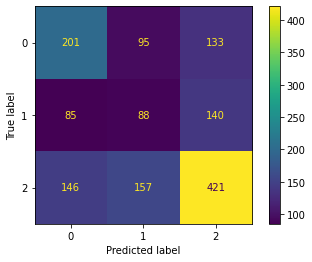

In [25]:
traditional_Machine_Learning(DecisionTreeClassifier())

**Run a Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.56      0.59      0.57       429
           1       0.20      0.12      0.15       313
           2       0.62      0.71      0.66       724

    accuracy                           0.55      1466
   macro avg       0.46      0.47      0.46      1466
weighted avg       0.51      0.55      0.53      1466



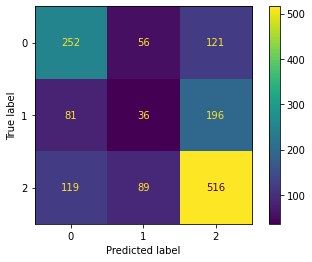

In [26]:
traditional_Machine_Learning(RandomForestClassifier())

**Run a XGB Classifier**

              precision    recall  f1-score   support

           0       0.58      0.59      0.59       429
           1       0.31      0.04      0.06       313
           2       0.61      0.83      0.70       724

    accuracy                           0.59      1466
   macro avg       0.50      0.49      0.45      1466
weighted avg       0.54      0.59      0.53      1466



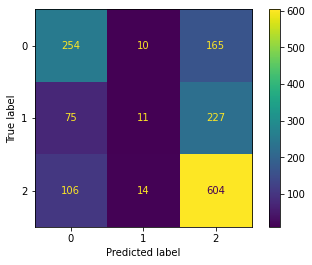

In [28]:
traditional_Machine_Learning(XGBClassifier())

**Observations**
- At a glance, we can see that the Random Forest Classifier and XGBoost outperforms the Decision Tree classifier in being able to predict a 'Lose' and 'Win'. However, both these models are not able to predict a draw as well as Decision Tree classifiers can. Upon consideration, it might be more worthwhile to choose models which perform well in being able to predict 'Loses' and "Wins' over 'Draws'. As such, it comes down to a choice between the Random Forest Classifier and the XGBoost tree.
- Between the Random Forest Classifier and XGBoost, I would choose the random forest classifier over the XGBoost. Reason being the XGBoost ability to correctly predict a draw is really terrible.

By these oberservations, we shall use the random forest classifier as the baseline model for making our predictions for the winner of World Cup 2022.

**Visualization Of Trees**

I find it a good practice to always look depeer into how a model is learning. For machine learning model's, this is relatively easy as one can do so by plotting trees and tracing through them. This way, we can get a better understanding of which factors are crucial to the model when it is making its decisions. This way, we can begin to move away from simply seeing machine learning model's as simple blackboxes.

While I have selected the Random Forest Classifier as the main model to use, the downside of it is that due to the nature of its architecture, it is not possible to generate an appropropriate tree to understand from. That is, as a random forest classifier learns from multiple trees, we are unable to get a tree that accurately illustrates how the model is learning. 

Decision trees on te other hand learn based on a single tree, as such they are easier to plot and visualize. However, as it only learns using one tree the performance of the model is typically lower than that of the random forest classifier. This is evident too in our problem. Hence why the random forest classifier was chosen as the baseline model for making our predictions for World Cup 2022.

**Visualize a Decision Tree up to a depth of 3**

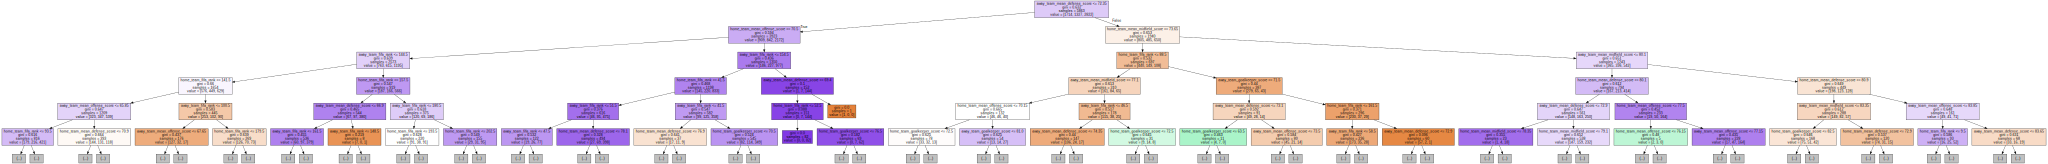

In [29]:
# Visualize a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X_train.columns, filled=True, max_depth=5)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**Visualize one instance of a Random Forest Tree up to a depth of 3**

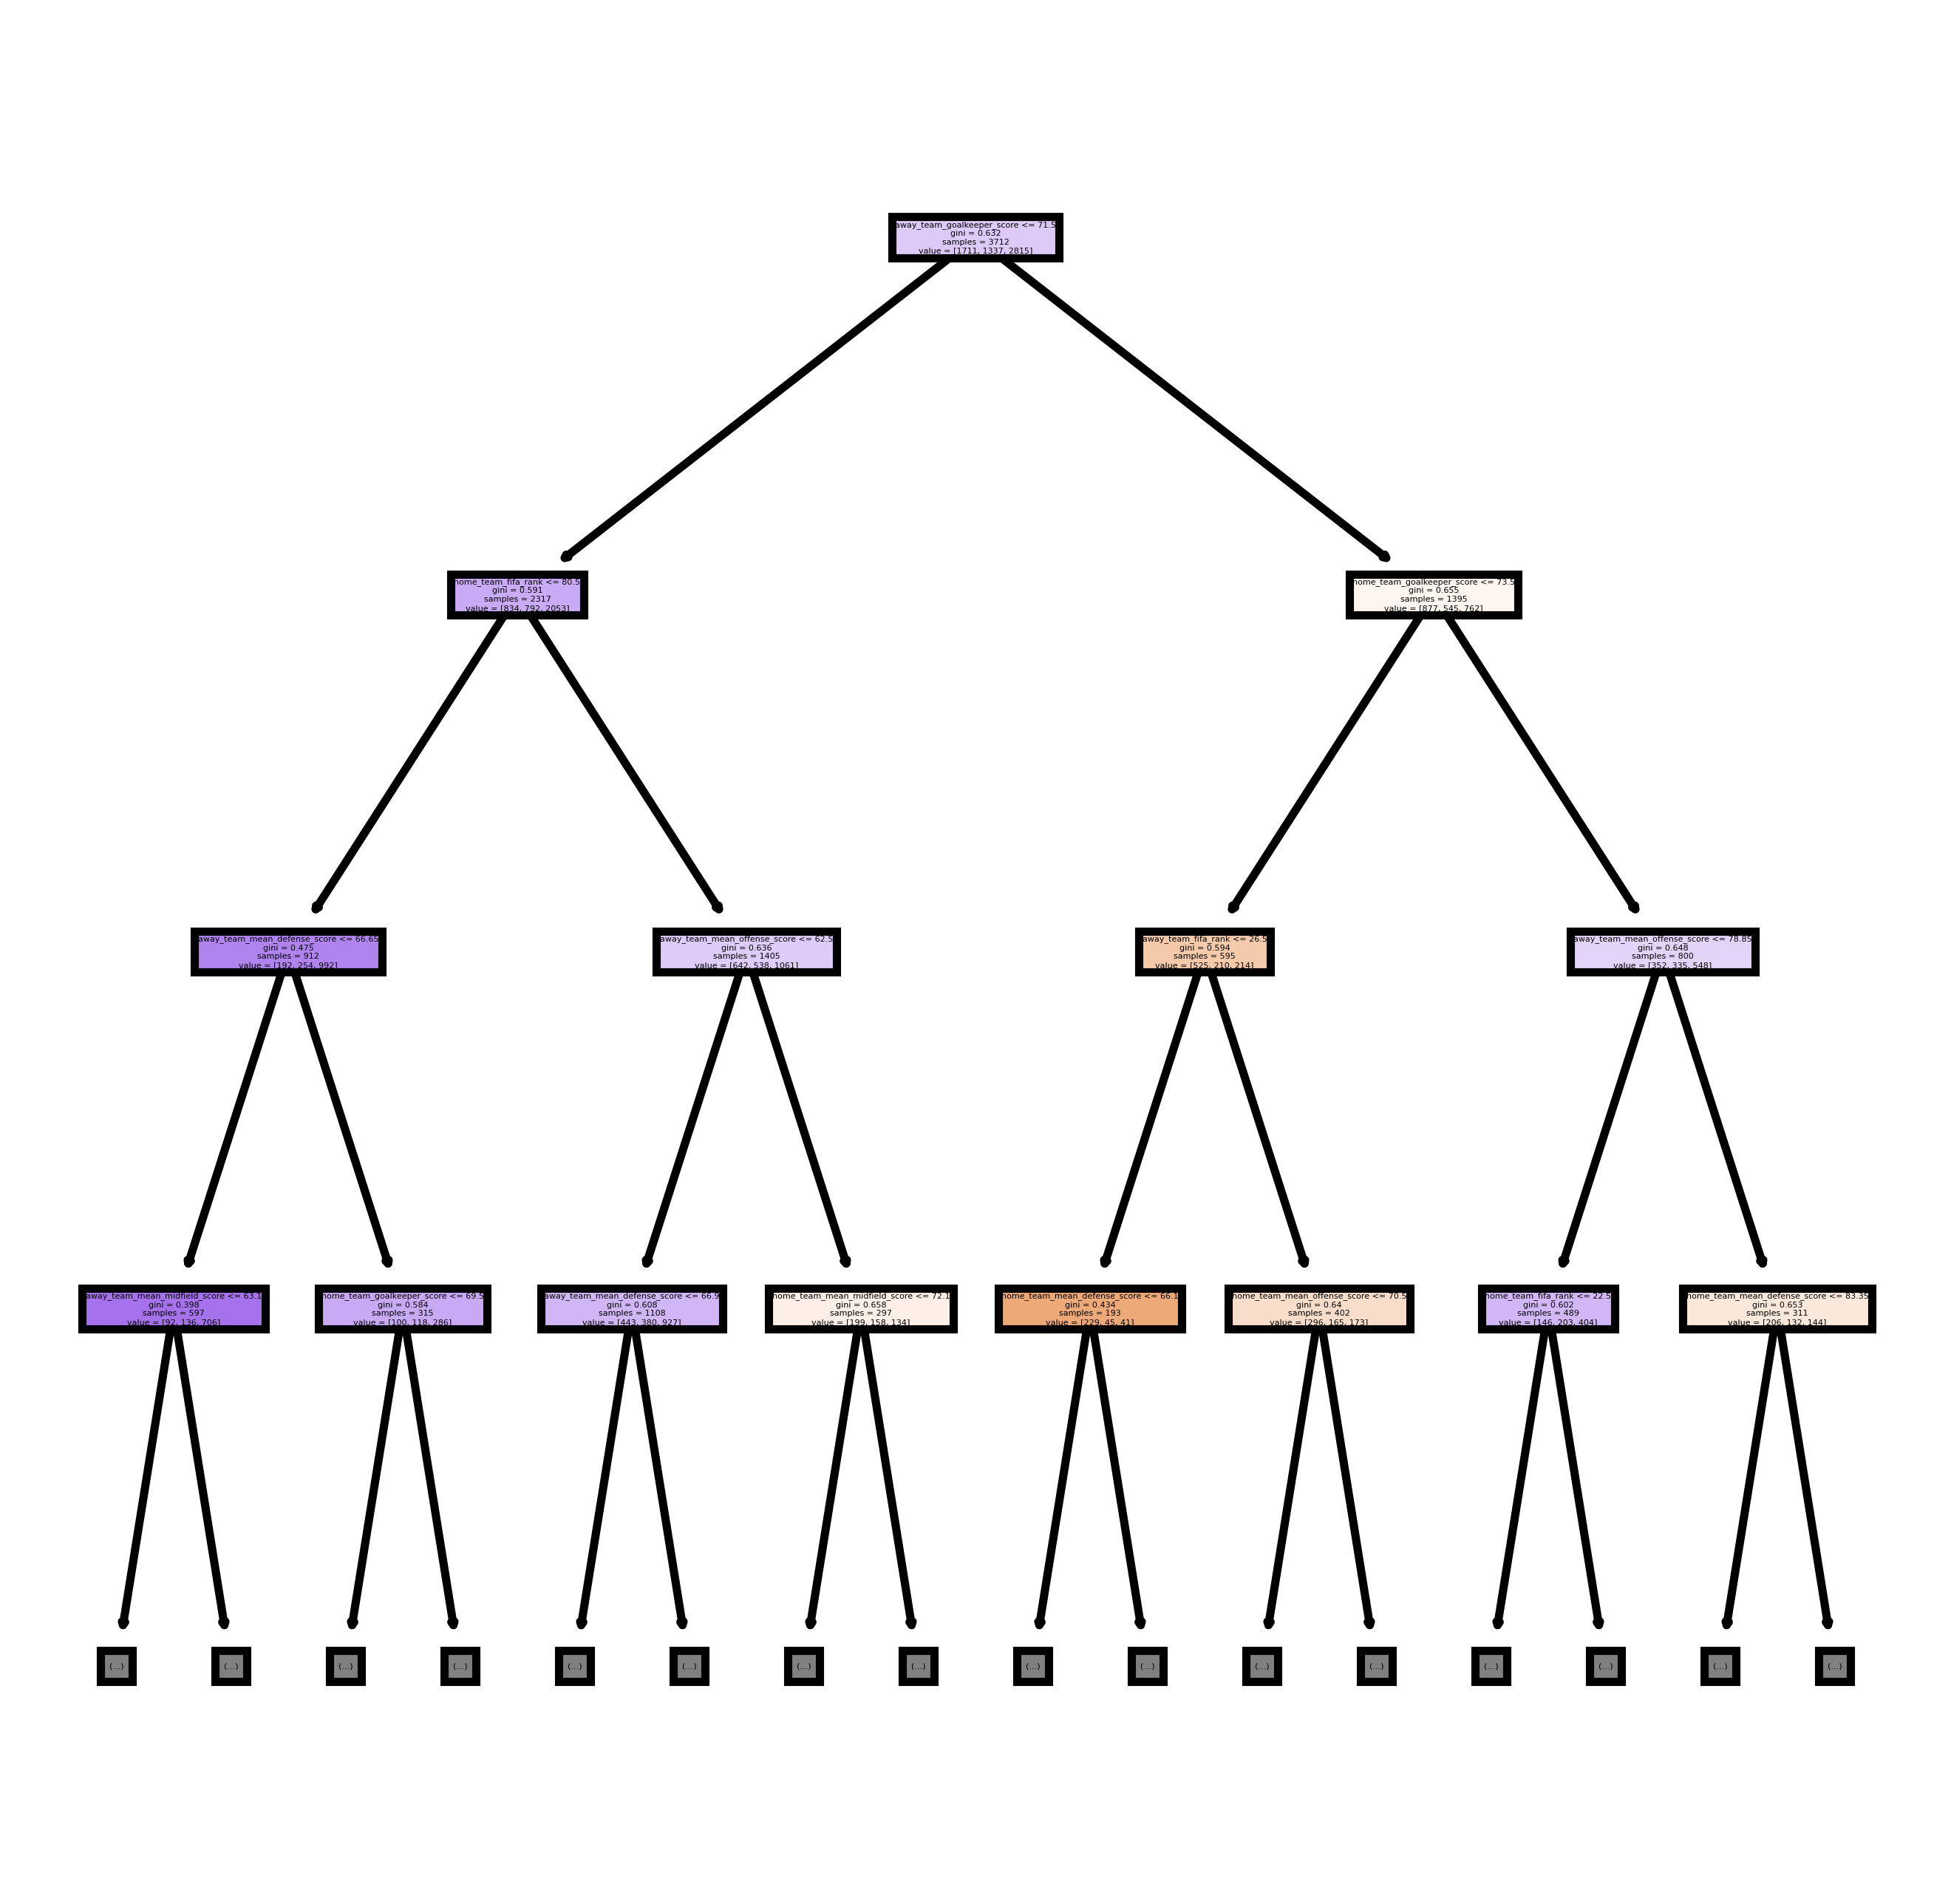

In [30]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
_ = tree.plot_tree(model.estimators_[0], feature_names=X_train.columns, filled=True, max_depth=3)

# save model
# filename = 'Finalized_2022_World_Cup_Model.sav'
# pickle.dump(model, open(filename, 'wb'))

## **Simulation**

And now for the part we've all been waiting for...

In this section, we shall be running simulations of all matches to be played from the group stages all the way to the final match so as to determine who would be crowned the champions of world football.

### **Load Model & Data Preparations**

**Load the saved model weights**

In [32]:
model = pickle.load(open('/content/Finalized_2022_World_Cup_Model.sav', 'rb')) # load the model weights

**Create dataframe with statistics of 'fifa_rank', 'goalkeeper_score', 'defense_score', 'offense_score', 'midfield_score' for each of the 32 teams**

In [35]:
df = pd.read_csv('/content/international_matches.csv', parse_dates = ['date']) # read csv into dataframe in again
df_2022 = df[df['date'].dt.year >= 2022]  # take only matches played in 2022 so as to get the most recent scores for each team

FIFA_2022_LATEST_RANKING = [3,38,2,1,43,41,31,12,10,44,5,4,11,61,20,24,28,13,22,8,26,9,50,51,18,21,7,15,30,16,14,19] # in same order as in FIFA_2022_TEAMS.sort()
features = ['fifa_rank', 'goalkeeper_score', 'defense_score', 'offense_score', 'midfield_score'] # these are the features in which we would populate our statistics dataframe with

# create dataframe
FIFA_2022_TEAMS_dict = {}
for f in features:
  FIFA_2022_TEAMS_dict[f] = {}
  for team in FIFA_2022_TEAMS:
    FIFA_2022_TEAMS_dict[f][team] = []

d = {'team': FIFA_2022_TEAMS, 'goalkeeper_score': [0]*32, 'defense_score': [0]*32,'offense_score': [0]*32,          
'midfield_score': [0]*32, 'fifa_rank': [0]*32 }
FIFA_2022_ratings = pd.DataFrame(data=d)

**Populate dataframe**

In [36]:
for i, t in enumerate(FIFA_2022_TEAMS):
    df_team_home = df_2022[df_2022['home_team'] == t]
    df_team_away = df_2022[df_2022['away_team'] == t]

    FIFA_2022_ratings['goalkeeper_score'].iloc[i] = (df_team_home['home_team_goalkeeper_score'].mean() + df_team_away['away_team_goalkeeper_score'].mean())/2 
    FIFA_2022_ratings['defense_score'].iloc[i] = (df_team_home['home_team_mean_defense_score'].mean() + df_team_away['away_team_mean_defense_score'].mean())/2 
    FIFA_2022_ratings['offense_score'].iloc[i] = (df_team_home['home_team_mean_offense_score'].mean() + df_team_away['away_team_mean_offense_score'].mean())/2 
    FIFA_2022_ratings['midfield_score'].iloc[i] = (df_team_home['home_team_mean_midfield_score'].mean() + df_team_away['away_team_mean_midfield_score'].mean())/2 
    FIFA_2022_ratings['fifa_rank'].iloc[i] = FIFA_2022_LATEST_RANKING[i]

# these data were still missing after populating the data, so I had to manuallt fill them in
# Qatar ratings
FIFA_2022_ratings['goalkeeper_score'].iloc[22] = 66
FIFA_2022_ratings['defense_score'].iloc[22] = 68
FIFA_2022_ratings['offense_score'].iloc[22] = 71
FIFA_2022_ratings['midfield_score'].iloc[22] = 70

# Tunisia goalkeeper ranking
FIFA_2022_ratings['goalkeeper_score'].iloc[28] = 71.5
FIFA_2022_ratings

,team,goalkeeper_score,defense_score,offense_score,midfield_score,fifa_rank
0,Argentina,84.0,82.2,89.0,84.0,3
1,Australia,77.0,72.0,72.3,73.5,38
2,Belgium,89.0,80.8,85.7,85.5,2
3,Brazil,89.0,84.8,86.3,85.5,1
4,Cameroon,67.0,76.8,77.7,75.0,43
5,Canada,76.0,69.2,73.0,78.0,41
6,Costa Rica,88.0,71.5,70.3,69.2,31
7,Croatia,82.0,77.8,76.7,84.2,12
8,Denmark,85.0,80.2,77.7,80.2,10
9,Ecuador,71.0,73.5,76.0,74.5,44


### **Simulate Group Stages**

#### **Prepare Data**

In [53]:
# Group matches to be played in the group stages
Group_A = [['Qatar', 'Ecuador'], ['Senegal', 'Netherlands'], ['Qatar', 'Senegal'], ['Ecuador', 'Netherlands'], ['Ecuador', 'Senegal'], ['Netherlands', 'Qatar']]
Group_B = [['England', 'IR Iran'], ['USA', "Wales"], ['Wales', 'IR Iran'], ['England', 'USA'], ['IR Iran', 'USA'], ['Wales', 'England']]
Group_C = [['Argentina', 'Saudi Arabia'], ['Mexico', 'Poland'], ['Poland', 'Saudi Arabia'], ['Argentina', 'Mexico'], ['Poland', 'Argentina'], ['Saudi Arabia', 'Mexico']]
Group_D = [['Denmark', 'Tunisia'], ['France', 'Australia'], ['Tunisia', 'Australia'], ['France', 'Denmark'], ['Tunisia', 'France'], ['Australia', 'Denmark']]
Group_E = [['Germany', 'Japan'], ['Spain', 'Costa Rica'], ['Japan', 'Costa Rica'], ['Spain', 'Germany'], ['Japan', 'Spain'], ['Costa Rica', 'Germany']]
Group_F = [['Morocco', 'Croatia'], ['Belgium', 'Canada'], ["Belgium", "Morocco"], ['Croatia', 'Canada'],['Croatia', 'Belgium'], ['Canada', 'Morocco']]
Group_G = [['Switzerland', 'Cameroon'], ['Brazil', 'Serbia'], ['Cameroon', 'Serbia'], ['Brazil', 'Switzerland'], ['Serbia', 'Switzerland'], ['Cameroon', 'Brazil']]
Group_H = [['Uruguay', 'Korea Republic'], ['Portugal', 'Ghana'], ['Korea Republic', 'Ghana'], ['Portugal', 'Uruguay'], ['Korea Republic', 'Portugal'], ['Ghana', 'Uruguay']]

group_stages = [Group_A, Group_B, Group_C, Group_D, Group_E, Group_F, Group_G, Group_H]

In [54]:
d = {'team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands'], 'Points': [0]*4}
df_group_A = pd.DataFrame(data=d)

d = {'team': ['England', 'IR Iran', 'USA', "Wales"], 'Points': [0]*4}
df_group_B = pd.DataFrame(data=d)

d = {'team': ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'], 'Points': [0]*4}
df_group_C = pd.DataFrame(data=d)

d = {'team': ['Denmark', 'Tunisia', 'France', 'Australia'], 'Points': [0]*4}
df_group_D = pd.DataFrame(data=d)

d = {'team': ['Germany', 'Japan', 'Spain', 'Costa Rica'], 'Points': [0]*4}
df_group_E = pd.DataFrame(data=d)

d = {'team': ['Morocco', 'Croatia','Belgium', 'Canada'], 'Points': [0]*4}
df_group_F = pd.DataFrame(data=d)

d = {'team': ['Switzerland', 'Cameroon', 'Brazil', 'Serbia'], 'Points': [0]*4}
df_group_G = pd.DataFrame(data=d)

d = {'team': ['Uruguay', 'Korea Republic', 'Portugal', 'Ghana'], 'Points': [0]*4}
df_group_H = pd.DataFrame(data=d)

df_group_lists = [df_group_A, df_group_B, df_group_C, df_group_D, df_group_E, df_group_F, df_group_G, df_group_H]

#### **Run Group Simulations**

In [55]:
# data_format = ['home_team_fifa_rank', 'away_team_fifa_rank',
#        'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
#        'home_team_mean_defense_score', 'home_team_mean_offense_score',
#        'home_team_mean_midfield_score', 'away_team_mean_defense_score',
#        'away_team_mean_offense_score', 'away_team_mean_midfield_score']
# FIFA_2022_ratings goalkeeper_score	defense_score	offense_score	midfield_score	fifa_rank
GROUPS = ['A', "B", 'C', 'D', 'E', 'F', 'G', 'H']
for i_g, g in enumerate(group_stages):
    print("=============================")
    print("GROUP", GROUPS[i_g], "MATCHES")
    print("=============================")

    for match in g:
      team_1 = match[0]
      team_2 = match[1]
      
      data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
             float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
              float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
              float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
                float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
      data = [data]

      prediction = model.predict(data)[0]

      if prediction == 2: # team_1 wins
        df_group_lists[i_g]['Points'][df_group_lists[i_g]['team'] == team_1] = df_group_lists[i_g][df_group_lists[i_g]['team'] == team_1]['Points'] + 3
        print("MATCH PLAYED", team_1, "VS", team_2, "WINNER:", team_1)
      elif prediction == 1: # both team_1 and team_2 draws
        df_group_lists[i_g]['Points'][df_group_lists[i_g]['team'] == team_1] = df_group_lists[i_g][df_group_lists[i_g]['team'] == team_1]['Points'] + 1
        df_group_lists[i_g]['Points'][df_group_lists[i_g]['team'] == team_2] = df_group_lists[i_g][df_group_lists[i_g]['team'] == team_2]['Points'] + 1
        print("MATCH PLAYED", team_1, "VS", team_2, "DRAW")
      else: # team_1 loses ie. team_2 wins 
        df_group_lists[i_g]['Points'][df_group_lists[i_g]['team'] == team_2] = df_group_lists[i_g][df_group_lists[i_g]['team'] == team_2]['Points'] + 3
        print("MATCH PLAYED", team_1, "VS", team_2, "WINNER:", team_2)

df_group_lists = [group.sort_values('Points', ascending=False) for group in df_group_lists]

GROUP A MATCHES
MATCH PLAYED Qatar VS Ecuador WINNER: Ecuador
MATCH PLAYED Senegal VS Netherlands WINNER: Netherlands
MATCH PLAYED Qatar VS Senegal WINNER: Senegal
MATCH PLAYED Ecuador VS Netherlands DRAW
MATCH PLAYED Ecuador VS Senegal WINNER: Senegal
MATCH PLAYED Netherlands VS Qatar WINNER: Netherlands
GROUP B MATCHES
MATCH PLAYED England VS IR Iran WINNER: England
MATCH PLAYED USA VS Wales WINNER: USA
MATCH PLAYED Wales VS IR Iran WINNER: Wales
MATCH PLAYED England VS USA WINNER: England
MATCH PLAYED IR Iran VS USA WINNER: IR Iran
MATCH PLAYED Wales VS England WINNER: England
GROUP C MATCHES
MATCH PLAYED Argentina VS Saudi Arabia WINNER: Argentina
MATCH PLAYED Mexico VS Poland WINNER: Mexico
MATCH PLAYED Poland VS Saudi Arabia WINNER: Poland
MATCH PLAYED Argentina VS Mexico WINNER: Argentina
MATCH PLAYED Poland VS Argentina DRAW
MATCH PLAYED Saudi Arabia VS Mexico WINNER: Mexico
GROUP D MATCHES
MATCH PLAYED Denmark VS Tunisia WINNER: Denmark
MATCH PLAYED France VS Australia WINNER:

**GROUP A RESULTS**

In [56]:
df_group_lists[0]

,team,Points
3,Netherlands,7
2,Senegal,6
1,Ecuador,4
0,Qatar,0


**GROUP B RESULTS**

In [57]:
df_group_lists[1]

,team,Points
0,England,9
1,IR Iran,3
2,USA,3
3,Wales,3


When this occurs, goal difference comes into play. 

However, as the model is only trained for detecting the outcome of the match as 'Lose', 'Draw', or 'Win, we cannot use goal difference to tell who finishes second in this group.

To determine this, I shall just apply biasness Considering Wales has a star player in Gareth Bale, lets bring Wales up to 2nd in the table.

**GROUP C RESULTS**

In [58]:
df_group_lists[2]

,team,Points
0,Argentina,7
2,Mexico,6
3,Poland,4
1,Saudi Arabia,0


**GROUP D RESULTS**

In [59]:
df_group_lists[3]

,team,Points
0,Denmark,9
2,France,6
1,Tunisia,1
3,Australia,1


**GROUP E RESULTS**

In [60]:
df_group_lists[4]

,team,Points
0,Germany,7
2,Spain,7
1,Japan,3
3,Costa Rica,0


**GROUP F RESULTS**

In [61]:
df_group_lists[5]

,team,Points
2,Belgium,9
1,Croatia,6
3,Canada,3
0,Morocco,0


**GROUP G RESULTS**

In [62]:
df_group_lists[6]

,team,Points
2,Brazil,9
3,Serbia,6
0,Switzerland,3
1,Cameroon,0


**GROUP H RESULTS**

In [63]:
df_group_lists[7]

,team,Points
2,Portugal,9
0,Uruguay,6
1,Korea Republic,3
3,Ghana,0


Looking at the predictions for the group stages, there does not seem to be any great upsets. In fact, the positions in the table seem rather plausible. Execpt for maybe group D where France should be expected to top the group.

#### **Run Round Of 16 Simulations**

**In the round of 16's, the teams that top the group would play against the runners up of the neighbouring group. That is, the winner of group A would play against the runners up of group B. Meanwhile, the winner of group B would play against the runners up of group A.**


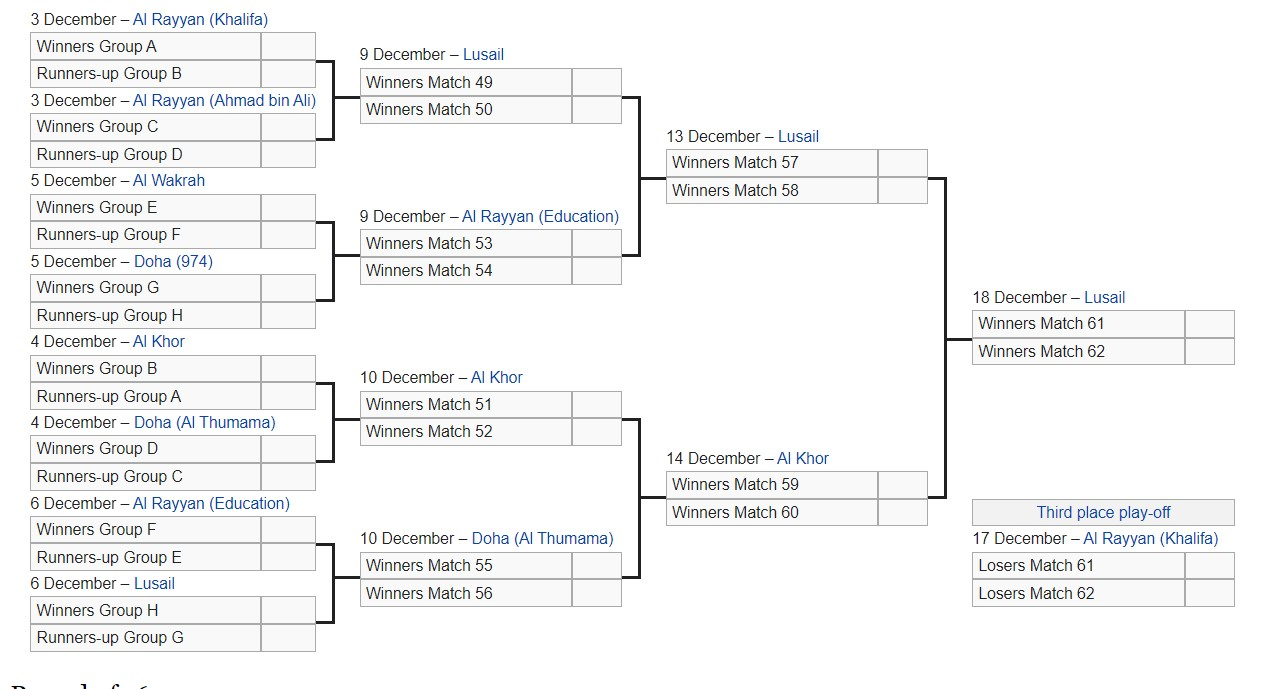

In [65]:
round_of_16 = [['Netherlands', 'Wales'], ['Argentina', 'France'], ['Germany', 'Croatia'], ['Brazil', 'Uruguay'], ['England', 'Senegal'], ['Denmark', 'Mexico'], ['Belgium', 'Spain'], ['Portugal', 'Serbia']]

round_of_16_winners = []
draws = []
for match in round_of_16:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    round_of_16_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    round_of_16_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED Netherlands VS Wales
MATCH OUTCOME Netherlands VS Wales WINNER: Netherlands

MATCH PLAYED Argentina VS France
MATCH OUTCOME Argentina VS France WINNER: France

MATCH PLAYED Germany VS Croatia
MATCH OUTCOME Germany VS Croatia DRAW

MATCH PLAYED Brazil VS Uruguay
MATCH OUTCOME Brazil VS Uruguay WINNER: Brazil

MATCH PLAYED England VS Senegal
MATCH OUTCOME England VS Senegal WINNER: England

MATCH PLAYED Denmark VS Mexico
MATCH OUTCOME Denmark VS Mexico WINNER: Denmark

MATCH PLAYED Belgium VS Spain
MATCH OUTCOME Belgium VS Spain WINNER: Spain

MATCH PLAYED Portugal VS Serbia
MATCH OUTCOME Portugal VS Serbia WINNER: Serbia



**Big upsest for Portugal as they get dumped out of the World Cup by Serbia!**

**Big favourites Argentina and heavyweights Belgium are knocked out too!** 

There is a draw between Gerrmany and Croatia. Since we are unable to predict this, lets just assume it went to a penalty shootout. 

To determine the penalty shootout, i'll just run a random generator that spits out either 0 or 1. With seed 0. 

0 being a Croatia Win
1 being a Germany win

In [66]:
random.seed(0)
# Generated random number will be between 1 to 1000.
print(random.randint(0,1)) 

1


Looks like Germany won the penalty shootout

Lets run a full penalty shootout using ABBA rules instead of just 1 instance of randomness to seal it all. 

We run random once to see who starts off the penalties

In [67]:
random.seed(0)
penalty_shootout = {'Germany':0, 'Croatia': 0}
print(random.randint(0,1))

1


Germany starts the penalties. We start off with 10 kicks first. After 10 kicks we than check if the scores are level. If they aren't, we have a winner. If they are level, carry on kicking.

In [68]:
random.seed(0)
for i in range(0,10):
  outcome = random.randint(0,1)
  if i % 4 == 0 or i % 4 == 3:
    if outcome == 1:
      penalty_shootout['Germany'] += 1
  if i % 4 == 1 or i % 4 == 2:
    if outcome == 1:
      penalty_shootout['Croatia'] += 1
penalty_shootout

{'Germany': 5, 'Croatia': 3}

Once again, Germany won. Based on making penalty shootouts a probability game, it looks like Germany has won it. 

On trying on aother seed. Seed 42, it needed 18 penalties to determine a winner. Yet again, Germany has won it. 


**With these factors pointing to a Germany win, lets bring Germany to the quater-finals**

In [77]:
penalty_shootout = {'Germany':0, 'Croatia': 0}
random.seed(42)
for i in range(0,18):
  outcome = random.randint(0,1)
  if i % 4 == 0 or i % 4 == 3:
    if outcome == 1:
      penalty_shootout['Germany'] += 1
  if i % 4 == 1 or i % 4 == 2:
    if outcome == 1:
      penalty_shootout['Croatia'] += 1
penalty_shootout

{'Germany': 2, 'Croatia': 1}

In [78]:
round_of_16_winners.append("Germany")

In [79]:
round_of_16_winners

['Netherlands',
 'France',
 'Brazil',
 'England',
 'Denmark',
 'Spain',
 'Serbia',
 'Germany']

#### **Run Quarter-Finals Simulations**

In [ ]:
quarter_finals = [['Netherlands', 'France'], ['Germany', 'Brazil'], ['England', 'Denmark'], ['Spain', 'Serbia']]

quarter_final_winners = []
draws = []
for match in quarter_finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    quarter_final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    quarter_final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED Netherlands VS France
MATCH OUTCOME Netherlands VS France WINNER: France

MATCH PLAYED Germany VS Brazil
MATCH OUTCOME Germany VS Brazil WINNER: Germany

MATCH PLAYED England VS Denmark
MATCH OUTCOME England VS Denmark WINNER: England

MATCH PLAYED Spain VS Serbia
MATCH OUTCOME Spain VS Serbia WINNER: Spain



#### **Run Semi-Finals Simulations** 

In [80]:
semi_finals = [['France', 'Germany'], ['England', 'Spain']]

semi_final_winners = []
draws = []
for match in semi_finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    semi_final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    semi_final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED France VS Germany
MATCH OUTCOME France VS Germany WINNER: France

MATCH PLAYED England VS Spain
MATCH OUTCOME England VS Spain DRAW



Since there is a Draw between England and Spain we need to do more randomness.

Using random seed 420

In [81]:
penalty_shootout = {'England':0, 'Spain': 0}
random.seed(420)
for i in range(0,10):
  outcome = random.randint(0,1)
  if i % 4 == 0 or i % 4 == 3:
    if outcome == 1:
      penalty_shootout['England'] += 1
  if i % 4 == 1 or i % 4 == 2:
    if outcome == 1:
      penalty_shootout['Spain'] += 1
penalty_shootout

{'England': 3, 'Spain': 2}

Using seed 69

In [82]:
penalty_shootout = {'England':0, 'Spain': 0}
random.seed(69)
for i in range(0,14):
  outcome = random.randint(0,1)
  if i % 4 == 0 or i % 4 == 3:
    if outcome == 1:
      penalty_shootout['England'] += 1
  if i % 4 == 1 or i % 4 == 2:
    if outcome == 1:
      penalty_shootout['Spain'] += 1
penalty_shootout

{'England': 4, 'Spain': 5}

Using seed 42069

In [83]:
penalty_shootout = {'England':0, 'Spain': 0}
random.seed(42069)
for i in range(0,10):
  outcome = random.randint(0,1)
  if i % 4 == 0 or i % 4 == 3:
    if outcome == 1:
      penalty_shootout['England'] += 1
  if i % 4 == 1 or i % 4 == 2:
    if outcome == 1:
      penalty_shootout['Spain'] += 1
penalty_shootout

{'England': 2, 'Spain': 4}

Using seed 69420

In [84]:
penalty_shootout = {'England':0, 'Spain': 0}
random.seed(69420)
for i in range(0,10):
  outcome = random.randint(0,1)
  if i % 4 == 0 or i % 4 == 3:
    if outcome == 1:
      penalty_shootout['England'] += 1
  if i % 4 == 1 or i % 4 == 2:
    if outcome == 1:
      penalty_shootout['Spain'] += 1
penalty_shootout

{'England': 3, 'Spain': 1}

using sed 123

In [85]:
penalty_shootout = {'England':0, 'Spain': 0}
random.seed(123)
for i in range(0,10):
  outcome = random.randint(0,1)
  if i % 4 == 0 or i % 4 == 3:
    if outcome == 1:
      penalty_shootout['England'] += 1
  if i % 4 == 1 or i % 4 == 2:
    if outcome == 1:
      penalty_shootout['Spain'] += 1
penalty_shootout

{'England': 4, 'Spain': 2}

Of the 3/5 seeds runned. England wins. Hence, we shall bring England through to the finals.

In [86]:
semi_final_winners.append('England')

In [87]:
semi_final_winners

['France', 'England']

#### **Run Third Place Simulations** 

In [88]:
third_place = [['Germany', 'Spain']]

third_place_winners = []
draws = []
for match in third_place:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    third_place_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    third_place_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED Germany VS Spain
MATCH OUTCOME Germany VS Spain WINNER: Germany



Germany finishes third in World Cup 2022 at the expense of Spain

#### **Run FINALS Simulations** 

And now, for what we've all been waiting for. The winner of the 2022 World Cup is...

In [ ]:
finals = [['France', 'England']]

final_winners = []
draws = []
for match in finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED France VS England
MATCH OUTCOME France VS England WINNER: England



**England are the 2022 World Cup winners in this route** 

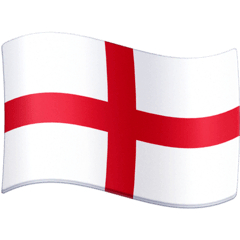

In this route (Assuming randomness wins the penalty shootouts), the rankings of FIFA World Cup 2022 are as such

1. England
2. France
3. Germany

#### ***What if...***

Earlier we saw tossups between Germany and Croatia, and Spain and England. We used randomness to determine the outcome of these matches. However, this definitely was not the most accurate way to determine the outcome of these situations.

So, what if it went the other way, what if Croatia got through in place of Germany? What if Spain beat England to the finals?

Lets simulate these situation too to get a bigger picture of our predictions

##### **What if Spain won the shootouts**

**First we run the match for third place**

In [111]:
third_place = [['Germany', 'England']]

third_place_winners = []
draws = []
for match in third_place:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    third_place_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    third_place_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED Germany VS England
MATCH OUTCOME Germany VS England DRAW



As it is a draw, we will just leave it as is, and declare third place as such

 3. Germany/England

**Simulate Finals**

In [90]:
finals = [['France', 'Spain']]

final_winners = []
draws = []
for match in finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED France VS Spain
MATCH OUTCOME France VS Spain DRAW



As it is a draw, we will just leave it as is, and declare first place as such

 1. France/Spain
 
 **Either France or Spain wins the 2022 World Cup in this route**

##### **What if Croatia won the shootouts rather than Germany in the rounds of 16 knockout stages**

In [91]:
quarter_finals = [['Netherlands', 'France'], ['Croatia', 'Brazil'], ['England', 'Denmark'], ['Spain', 'Serbia']]

quarter_final_winners = []
draws = []
for match in quarter_finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    quarter_final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    quarter_final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED Netherlands VS France
MATCH OUTCOME Netherlands VS France WINNER: France

MATCH PLAYED Croatia VS Brazil
MATCH OUTCOME Croatia VS Brazil DRAW

MATCH PLAYED England VS Denmark
MATCH OUTCOME England VS Denmark WINNER: England

MATCH PLAYED Spain VS Serbia
MATCH OUTCOME Spain VS Serbia WINNER: Spain



**A draw occurs between Brazil and Croatia. Just run the simulation for the semi-finals for the two routes.**

In [95]:
# Simulation for semi-finals where Croatia beat Brazil
print("==================================")
print("SIMULATION FOR WHERE CROATIA BEAT BRAZIL")
semi_finals = [['France', 'Croatia'], ['England', 'Spain']]

semi_final_winners = []
draws = []
for match in semi_finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    semi_final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    semi_final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

print("ALTERNATIVELY")
print()

# Simulation for semi-finals where Brazil beat Croatia
print("==================================")
print("SIMULATION FOR WHERE BRAZIL BEAT CROATIA")
semi_finals = [['France', 'Brazil'], ['England', 'Spain']]

semi_final_winners = []
draws = []
for match in semi_finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    semi_final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    semi_final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

SIMULATION FOR WHERE CROATIA BEAT BRAZIL
MATCH PLAYED France VS Croatia
MATCH OUTCOME France VS Croatia WINNER: Croatia

MATCH PLAYED England VS Spain
MATCH OUTCOME England VS Spain DRAW

ALTERNATIVELY

SIMULATION FOR WHERE BRAZIL BEAT CROATIA
MATCH PLAYED France VS Brazil
MATCH OUTCOME France VS Brazil WINNER: France

MATCH PLAYED England VS Spain
MATCH OUTCOME England VS Spain DRAW



###### **Lets follow the route where Croatia beats Brazil first**

**Third Place**

In [110]:
# Simulation for third where England beats Spain
print("==================================")
print("SIMULATION FOR WHERE ENGLAND BEAT SPAIN")
third_place = [['France', 'Spain']]

third_place_winners = []
draws = []
for match in third_place:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    third_place_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    third_place_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

# Simulation for third where Spain beats England
print("==================================")
print("SIMULATION FOR WHERE SPAIN BEAT ENGLAND")

third_place = [['England', 'France']]

third_place_winners = []
draws = []

for match in third_place:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    third_place_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    third_place_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

SIMULATION FOR WHERE ENGLAND BEAT SPAIN
MATCH PLAYED France VS Spain
MATCH OUTCOME France VS Spain DRAW

SIMULATION FOR WHERE SPAIN BEAT ENGLAND
MATCH PLAYED England VS France
MATCH OUTCOME England VS France WINNER: France



As it is a draw, we will just leave it as is, and declare third place as such

**3rd.** France/Spain for when England beats Spain to get to the finals

**3rd.** France for when Spain beats England to get to the finals

**FINALS**

In [104]:
finals = [['Croatia', 'England']]

final_winners = []
draws = []
for match in finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

print("ALTERNATIVELY")
print()

finals = [['Croatia', 'Spain']]

final_winners = []
draws = []
for match in finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED Croatia VS England
MATCH OUTCOME Croatia VS England DRAW

ALTERNATIVELY

MATCH PLAYED Croatia VS Spain
MATCH OUTCOME Croatia VS Spain DRAW



**Either Croatia, England, or Spain wins the 2023 World Cup in this route**

###### **Lets follow the route where Brazil beats Croatia**

**Third Place**

In [112]:
# Simulation for third where England beats Spain
print("==================================")
print("SIMULATION FOR WHERE ENGLAND BEAT SPAIN")
third_place = [['Brazil', 'Spain']]

third_place_winners = []
draws = []
for match in third_place:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    third_place_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    third_place_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

# Simulation for third where Spain beats England
print("==================================")
print("SIMULATION FOR WHERE SPAIN BEAT ENGLAND")

third_place = [['England', 'Brazil']]

third_place_winners = []
draws = []

for match in third_place:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # team_1 wins
    third_place_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # team_1 and team_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # team_1 loses ie. team_2 wins 
    third_place_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

SIMULATION FOR WHERE ENGLAND BEAT SPAIN
MATCH PLAYED Brazil VS Spain
MATCH OUTCOME Brazil VS Spain WINNER: Spain

SIMULATION FOR WHERE SPAIN BEAT ENGLAND
MATCH PLAYED England VS Brazil
MATCH OUTCOME England VS Brazil DRAW



As it is a draw, we will just leave it as is, and declare third place as such

**3rd.** Spain for when England beats Spain to get to the finals

**3rd.** England/Brazil for when Spain beats England to get to the finals

**FINALS**

In [113]:
finals = [['France', 'England']]

final_winners = []
draws = []
for match in finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

print("ALTERNATIVELY")
print()

finals = [['France', 'Spain']]

final_winners = []
draws = []
for match in finals:
  team_1 = match[0]
  team_2 = match[1]
  
  print("==================================")

  print("MATCH PLAYED", team_1, "VS", team_2)
  
  data = [float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['fifa_rank']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['fifa_rank']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['goalkeeper_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['goalkeeper_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['defense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['offense_score']), \
          float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_1]['midfield_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['defense_score']), \
            float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['offense_score']), float(FIFA_2022_ratings[FIFA_2022_ratings['team'] == team_2]['midfield_score']) ]
  data = [data]

  prediction = model.predict(data)[0]

  if prediction == 2: # is team_1 wins
    final_winners.append(team_1)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_1)
  elif prediction == 1: # is both team_1 and eam_2 draws
    draws.append((team_1, team_2))
    print("MATCH OUTCOME", team_1, "VS", team_2, "DRAW")
  else: # is both team_1 loses ie. team_2 wins 
    final_winners.append(team_2)
    print("MATCH OUTCOME", team_1, "VS", team_2, "WINNER:", team_2)

  print("==================================")
  print()

MATCH PLAYED France VS England
MATCH OUTCOME France VS England WINNER: England

ALTERNATIVELY

MATCH PLAYED France VS Spain
MATCH OUTCOME France VS Spain DRAW



**Either France, England, or Spain wins the 2023 World Cup in this route**

# **Final Summary**

From the different routes possible, the **most popular countries projected to win** the 2023 World Cup are **England, France, Spain, and Croatia**.


Unfortunately, due to the occurences of draws in football which either go to extra time or penalty shootouts, we were unable to get a clear undisputed idea of who would win World Cup 2022.

Instead, what we found were favourite contenders to win the 2022 World Cup.


**In particular, of all the possible routes these countries appeared as winners the following number of times.**


*   **England: 3**
*   **Spain: 3**
*   **France: 2**
*   **Croatia: 1**

The hot favourites according to my model to lift World Cup 2022 is thus either Spain or England.

However, as my very first route pointed to an England win in a finals match between England and Spain. I shall take England as World Cup 2022 winners!